In [2]:
import cv2
import matplotlib.pyplot as plt
from cv2 import cvtColor
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import functions
from skimage.feature import hog
from skimage import data, exposure
import face_recognition

#Importing libraries 

First, we are processing our image. In order to be able to differintiate faces and check whether it's the same person on the picture, we should be able to distinguish face on the picture. In order to do so, we would use Histogram of Oriented Gradients, or HOG for short, to detect the face on the image

Accepting image for an input and building HOG

In [2]:
# initialize the camera
cam = cv2.VideoCapture(0)   # 0 -> index of camera
s, image = cam.read()
cv2.imshow("test", 0)
 

opencv_frame_0.png written!
Escape hit, closing...


D:\Users\Angi\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


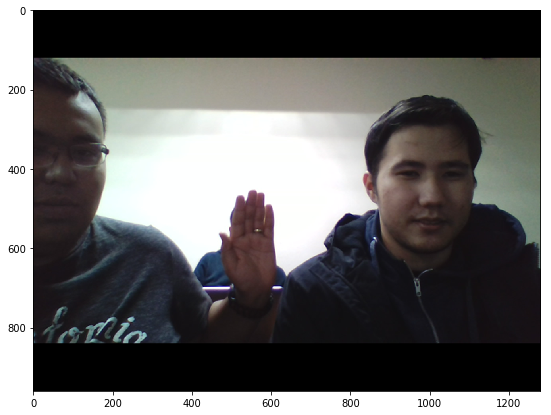

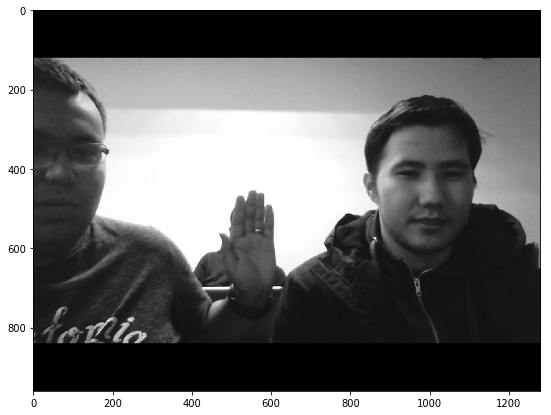

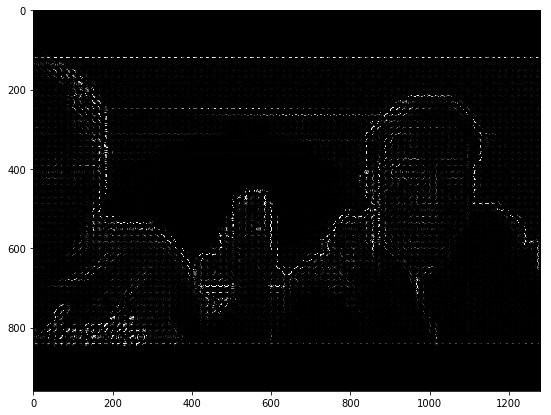

In [11]:

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    
    cv2.imshow("test", frame)
    if not ret:
        break
    k = cv2.waitKey(1) 

    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        cv2.imwrite("Vlad.png", frame)
        print("{} written!".format(img_name))
        img_counter += 1
        
        #img = functions.BGR_to_RGB(frame)        
        #frame = functions.RGB_to_GRAY(img)
        height, width = frame.shape[:2]
        frame = cv2.resize(frame,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
        
        img = cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cvtColor(img, cv2.COLOR_RGB2GRAY)
        lel = frame
 
cam.release()

cv2.destroyAllWindows()
    
image = lel

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

normal=plt.figure("Normal",figsize=(20, 7))

plt.imshow(img)

casual=plt.figure('Processed',figsize=(20, 7))
plt.imshow(image, cmap='Greys_r')

vectorized=plt.figure('Histogram of Oriented Gradients',figsize=(20, 7))
plt.imshow(hog_image_rescaled, cmap='Greys_r')

plt.show()

In [12]:
import sys
import dlib
from skimage import io

file_name = 'C:\\Users\\Angi\\Hackday\\opencv_frame_0.png'

face_detector = dlib.get_frontal_face_detector()

win = dlib.image_window()

image = io.imread(file_name)

detected_faces = face_detector(image, 1)

print("I found {} faces in the file {}".format(len(detected_faces), file_name))

win.set_image(image)

for i, face_rect in enumerate(detected_faces):

    print("- Face #{} found at Left: {} Top: {} Right: {} Bottom: {}".format(i, face_rect.left(), face_rect.top(), face_rect.right(), face_rect.bottom()))

    win.add_overlay(face_rect)

#print("Face found at Left: {} Top: {} Right: {} Bottom: {}".format(detected_faces[0].left(), detected_faces[0].top(), detected_faces[0].right(), detected_faces[0].bottom()))
dlib.hit_enter_to_continue()

I found 1 faces in the file C:\Users\Angi\Hackday\opencv_frame_0.png
- Face #0 found at Left: 440 Top: 168 Right: 569 Bottom: 297


168 440


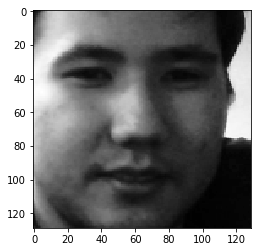

In [13]:
import cv2
#plt.imshow(image)
y = face_rect.top()
h = face_rect.bottom() - y

x = face_rect.left()
w = face_rect.right() - x

print(y, x)
"""print(detected_faces[0])
cv2.imshow("cropp", image)
y = detected_faces[0].top()
h = detected_faces[0].bottom() - y

x = detected_faces[0].left()
w = detected_faces[0].right() - x
"""
image = cvtColor(image, cv2.COLOR_BGR2RGB)
frame = cvtColor(image, cv2.COLOR_RGB2GRAY)
crop_img = frame[y:y+h, x:x+w] 
plt.imshow(crop_img, cmap='Greys_r')
#cv2.waitKey(0)

In [14]:
known_daler_image = face_recognition.load_image_file("Daler.png")
known_vlad_image = face_recognition.load_image_file("Vlad.png")

# Get the face encodings for the known images
daler_face_encoding = face_recognition.face_encodings(known_daler_image)[0]
vlad_face_encoding = face_recognition.face_encodings(known_vlad_image)[0]

known_encodings = [
    daler_face_encoding,
    vlad_face_encoding
]

# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("Daler2.png")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.23 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.54 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? False



In [18]:
import sounddevice as sd

duration = 3  # seconds
fs = 44100
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
sd.play(myrecording, fs)
